In [1]:
import os
os.chdir('../src')

from utils import data_utils

import pandas as pd
import numpy as np
import anndata as ad
pd.set_option("display.max_columns", None)

In [56]:
data = data_utils.load_anndata(mode='train+test', plus_iid_holdout=True)

d:\dlls-hack\.venv\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [57]:
data.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,GEX_pseudotime_order,Samplename,Site,DonorNumber,Modality,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,0.000000,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,0.964631,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAATCACCACGGAAGT-1-s4d9,2115,4.367301,0.916475,G2M,123,3283.0,10.0,Lymph prog,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
GCTGGGTGTACGGATG-1-s4d9,1484,4.974369,0.508755,S,124,2695.0,14.0,CD8+ T naive,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
TCGAAGTGTGACAGGT-1-s4d9,801,8.842443,0.232119,G1,132,3590.0,14.0,T reg,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
GCAGGCTGTTGCATAC-1-s4d9,1630,8.500611,0.549119,G1,133,5432.0,17.0,CD4+ T naive,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test


In [54]:
data.var['feature_types'].value_counts(), len(data.var)

(feature_types
 GEX    13953
 ADT      134
 Name: count, dtype: int64,
 14087)

In [3]:
len(data.obs_names.values), len(np.unique(data.obs_names.values))

(75195, 75195)

In [4]:
data.obs_names.isin(data.obs_names.values[:10]).sum()

10

In [5]:
data[data.obs_names[:10]]

View of AnnData object with n_obs × n_vars = 10 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
data.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,GEX_pseudotime_order,Samplename,Site,DonorNumber,Modality,VendorLot,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,NaN,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,0.000000,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,0.964631,site1_donor1_cite,site1,donor1,cite,3054455,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCCACGTCATGGTGGA-1-s4d9,1753,4.057052,0.642727,G2M,128,3850.0,12.0,CD4+ T activated,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
ATCACAGAGATTACCC-1-s4d9,1430,6.842241,0.460635,G2M,136,3456.0,19.0,Naive CD20+ B IGKC+,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
ATCATTCGTGATCGTT-1-s4d9,1208,6.211637,0.388865,G2M,122,1984.0,10.0,CD4+ T naive,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
TTCCACGGTTGAGGAC-1-s4d9,4390,6.154191,2.899356,S,130,3242.0,13.0,NK,s4d9,NaN,NaN,site4_donor9_cite,site4,donor9,cite,3061608,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout


In [7]:
data

View of AnnData object with n_obs × n_vars = 75195 × 14087
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [8]:
data.obs.columns

Index(['GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors',
       'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts',
       'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker',
       'is_train'],
      dtype='object')

In [9]:
data.obs['Modality'].value_counts()

Modality
cite    75195
Name: count, dtype: int64

In [10]:
data.obs['cell_type'].value_counts().keys()

CategoricalIndex(['CD14+ Mono', 'CD4+ T activated', 'CD4+ T naive', 'NK',
                  'Reticulocyte', 'Erythroblast', 'Naive CD20+ B IGKC+',
                  'CD8+ T naive', 'CD16+ Mono', 'NK CD158e1+', 'pDC',
                  'G/M prog', 'cDC2', 'Naive CD20+ B IGKC-', 'HSC',
                  'Normoblast', 'Lymph prog', 'Transitional B',
                  'CD8+ T TIGIT+ CD45RO+', 'CD8+ T CD57+ CD45RA+',
                  'Proerythroblast', 'CD8+ T TIGIT+ CD45RA+',
                  'CD4+ T activated integrinB7+', 'CD8+ T CD49f+',
                  'B1 B IGKC+', 'CD8+ T CD69+ CD45RO+', 'CD8+ T CD57+ CD45RO+',
                  'CD8+ T CD69+ CD45RA+', 'MAIT', 'MK/E prog', 'B1 B IGKC-',
                  'T reg', 'ILC1', 'gdT CD158b+', 'Plasma cell IGKC+',
                  'Plasma cell IGKC-', 'Plasmablast IGKC+', 'gdT TCRVD2+',
                  'ILC', 'Plasmablast IGKC-', 'CD4+ T CD314+ CD45RA+', 'dnT',
                  'CD8+ T naive CD127+ CD26- CD101-', 'T prog cycling',
  

In [11]:
aggregation_mapping = {
    'CD14+ Mono': 'Monocytes',
    'CD16+ Mono': 'Monocytes',
    'CD4+ T activated': 'T Cells',
    'CD4+ T naive': 'T Cells',
    'CD8+ T naive': 'T Cells',
    'CD8+ T CD57+ CD45RO+': 'T Cells',
    'CD8+ T CD57+ CD45RA+': 'T Cells',
    'CD8+ T TIGIT+ CD45RO+': 'T Cells',
    'CD8+ T TIGIT+ CD45RA+': 'T Cells',
    'CD8+ T CD49f+': 'T Cells',
    'CD8+ T CD69+ CD45RO+': 'T Cells',
    'CD8+ T CD69+ CD45RA+': 'T Cells',
    'CD8+ T naive CD127+ CD26- CD101-': 'T Cells',
    'CD4+ T activated integrinB7+': 'T Cells',
    'CD4+ T CD314+ CD45RA+': 'T Cells',
    'MAIT': 'T Cells',
    'gdT CD158b+': 'T Cells',
    'gdT TCRVD2+': 'T Cells',
    'dnT': 'T Cells',
    'T reg': 'T Cells',
    'T prog cycling': 'T Cells',
    'Naive CD20+ B IGKC+': 'B Cells',
    'Naive CD20+ B IGKC-': 'B Cells',
    'Transitional B': 'B Cells',
    'B1 B IGKC+': 'B Cells',
    'B1 B IGKC-': 'B Cells',
    'Plasma cell IGKC+': 'Plasma Cells',
    'Plasma cell IGKC-': 'Plasma Cells',
    'Plasmablast IGKC+': 'Plasma Cells',
    'Plasmablast IGKC-': 'Plasma Cells',
    'NK': 'NK Cells',
    'NK CD158e1+': 'NK Cells',
    'cDC1': 'Dendritic Cells',
    'cDC2': 'Dendritic Cells',
    'pDC': 'Dendritic Cells',
    'HSC': 'Progenitors and Stem Cells',
    'Lymph prog': 'Progenitors and Stem Cells',
    'G/M prog': 'Progenitors and Stem Cells',
    'MK/E prog': 'Progenitors and Stem Cells',
    'Reticulocyte': 'Erythroid Lineage',
    'Erythroblast': 'Erythroid Lineage',
    'Proerythroblast': 'Erythroid Lineage',
    'Normoblast': 'Erythroid Lineage',
    'ILC': 'Innate Lymphoid Cells',
    'ILC1': 'Innate Lymphoid Cells',
    # Add any other categories and mappings here
}


In [12]:
data.obs['cell_type'].map(aggregation_mapping).value_counts()

cell_type
Monocytes                     23011
T Cells                       20707
Erythroid Lineage              9921
B Cells                        6397
NK Cells                       6064
Progenitors and Stem Cells     4518
Dendritic Cells                3215
Plasma Cells                    802
Innate Lymphoid Cells           560
Name: count, dtype: int64

In [13]:
data.var

,feature_types,gene_id
AL627309.5,GEX,ENSG00000241860
LINC01409,GEX,ENSG00000237491
LINC01128,GEX,ENSG00000228794
LINC00115,GEX,ENSG00000225880
FAM41C,GEX,ENSG00000230368
...,...,...
HLA-E,ADT,ENSG00000204592
CD82,ADT,ENSG00000085117
CD101,ADT,ENSG00000134256
CD88,ADT,NaN


In [15]:
dense_data = data.layers['counts'].toarray()

In [16]:
(data.var['feature_types'] == 'GEX').values

array([ True,  True,  True, ..., False, False, False])

In [17]:
dense_data.shape

(75195, 14087)

### Layers

In [18]:
gex_indicator = (data.var["feature_types"] == "GEX").values

In [19]:
expressions = data.layers['counts'].toarray()

In [29]:
gex_expressions = pd.DataFrame(data=expressions[:, gex_indicator][:, :64], columns=data.var.index[gex_indicator][:64], index=data.obs.index)
adt_expressions = pd.DataFrame(data=expressions[:, ~gex_indicator][:, :64], columns=data.var.index[~gex_indicator][:64], index=data.obs.index)
print(gex_expressions.shape, adt_expressions.shape)

(75195, 64) (75195, 64)


In [35]:
from pandas import DataFrame
from typing import List, Optional, Tuple
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def make_histograms(
    df: DataFrame,
    quant_vars: List[str],
    title: str,
    subplots_shape: Optional[Tuple] = None,
    display_desc: bool = False,
    title_shift: float = 1,
    bins: int = 100,
    y_label: str = "PDF estimation",
) -> None:
    r"""
    Plot histograms of the given quantitative variables in the dataframe.
    """

    if subplots_shape is not None:
        num_rows, num_cols = subplots_shape
    else:
        num_plots = len(quant_vars)
        num_rows = (num_plots + 1) // 2
        num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 2 * num_rows))
    axes = np.atleast_2d(axes)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    if display_desc:
        fig.suptitle(title, fontsize=16, y=title_shift)

    for i, var in enumerate(quant_vars):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.hist(df[var], bins=bins, color="grey", edgecolor="black", density=False)
        ax.set_xlabel(var)
        ax.set_ylabel(y_label, fontsize=7)
        ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

    plt.show()

In [36]:
gex_expressions.describe()

,AL627309.5,LINC01409,LINC01128,LINC00115,FAM41C,NOC2L,KLHL17,HES4,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,UBE2J2,SCNN1D,ACAP3,PUSL1,INTS11,CPTP,DVL1,AURKAIP1,CCNL2,MRPL20-AS1,MRPL20,ATAD3C,ATAD3B,ATAD3A,SSU72,AL645728.1,FNDC10,AL691432.2,MIB2,MMP23B,CDK11B,FO704657.1,SLC35E2B,CDK11A,SLC35E2A,NADK,GNB1,PRKCZ,AL590822.2,FAAP20,SKI,MORN1,RER1,PEX10,PLCH2,PANK4,AL139246.5,TNFRSF14-AS1,TNFRSF14,AL139246.3,PRXL2B,TTC34,MEGF6,TPRG1L,WRAP73,SMIM1,LRRC47,CEP104
count,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000
mean,0.010506,0.038540,0.061746,0.007833,0.010612,0.115899,0.005585,0.041306,0.540900,0.003976,0.014536,0.029736,0.039378,0.228127,0.054379,0.002460,0.177525,0.002939,0.050030,0.042011,0.119370,0.031678,0.022222,0.594960,0.158601,0.037290,0.667983,0.005253,0.032356,0.046107,0.438034,0.038327,0.017993,0.015147,0.099807,0.015919,0.113891,0.002726,0.043753,0.156287,0.027661,0.168216,0.480338,0.015320,0.003511,0.254458,0.068848,0.008378,0.381488,0.026491,0.006423,0.022501,0.052105,0.014802,0.277612,0.004163,0.024284,0.005346,0.014243,0.066201,0.059273,0.328054,0.078862,0.060257
std,0.104026,0.205398,0.278407,0.090539,0.104270,0.370375,0.075591,0.348752,1.662795,0.065012,0.124264,0.212000,0.267495,0.528275,0.244759,0.050603,0.465091,0.054865,0.235543,0.212713,0.369577,0.180967,0.153592,1.096718,0.430142,0.199056,1.216322,0.076402,0.189642,0.253422,0.791005,0.208075,0.143047,0.126420,0.345385,0.135665,0.364506,0.055599,0.217772,0.428388,0.173996,0.468028,0.886230,0.126767,0.059820,0.571289,0.278986,0.094726,0.766712,0.168906,0.084421,0.153941,0.257862,0.126566,0.590933,0.067015,0.165342,0.074723,0.128196,0.268191,0.252045,1.574947,0.302492,0.259100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [37]:
adt_expressions.describe()

,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,CD3,CD8,CD56,CD19,CD33,CD11c,HLA-A-B-C,CD45RA,CD123,CD7,CD105,CD49f,CD194,CD4,CD44,CD14,CD16,CD25,CD45RO,CD279,TIGIT,CD20,CD335,CD31,Podoplanin,CD146,IgM,CD5,CD195,CD32,CD196,CD185,CD103,CD69,CD62L,CD161,CD152,CD223,KLRG1,CD27,CD107a,CD95,CD134,HLA-DR,CD1c,CD11b,CD64,CD141,CD1d,CD314,CD35,CD57,CD272,CD278
count,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000,75195.000000
mean,3.162351,4.723333,11.673223,2.698331,6.347004,50.358322,48.918240,5.978576,14.758907,21.438513,22.299887,12.703451,8.192300,8.595066,8.560250,12.473688,40.578457,85.160820,6.670284,29.169147,8.913943,24.573111,1.705193,16.157511,55.118584,6.015613,7.843128,1.348241,23.265137,11.057730,6.838141,8.735088,5.223459,20.112082,6.016504,1.596995,29.532415,40.579800,6.775756,22.011238,5.078822,5.403418,2.475324,1.851759,7.949265,6.126032,8.568295,4.802234,10.543587,7.507627,8.833566,31.306177,4.172711,16.743454,2.521271,7.081149,2.785518,20.764280,13.728865,11.786954,29.444710,9.671122,4.005692,7.122734
std,11.334388,6.230072,11.081039,10.560143,9.133424,77.904228,86.507027,16.530191,12.659092,53.254890,62.400829,59.752121,35.342327,38.030331,38.785309,44.500023,83.632973,210.898483,49.672779,88.626091,9.563075,44.792484,9.315085,50.669350,104.139870,20.527948,45.814835,3.624734,59.757301,13.045581,9.438111,34.102234,13.087714,60.467216,8.165022,7.476762,193.960159,124.684486,16.724432,75.323151,13.534426,12.118824,20.475441,9.384758,27.538759,16.228420,7.832098,4.676289,43.395279,22.877880,15.443221,47.538612,4.263741,58.197327,16.592533,24.420286,8.417138,28.522844,20.516886,23.662024,91.608124,45.723389,8.876471,17.606777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,0.000000,2.000000,8.000000,6.000000,1.000000,6.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,2.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9.000000,5.000000,3.000000,1.000000,2.000000,1.000000,1.000000
50%,1.000000,3.000000,8.000000,1.000000,4.000000,16.000000,16.000000,3.000000,11.000000,6.000000,2.000000,0.000000,3.000000,1.000000,1.000000,1.000000,11.000000,11.000000,1.000000,1.000000,6.000000,10.000000,0.000000,2.000000,16.000000,2.000000,1.000000,1.000000,9.000000,7.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.000000,7.000000,3.000000,4.000000,2.000000,2.000000,3.000000,1.00000

In [44]:
print(np.max(expressions[:, gex_indicator]), np.max(expressions[:, ~gex_indicator]))

35451.0 28229.0


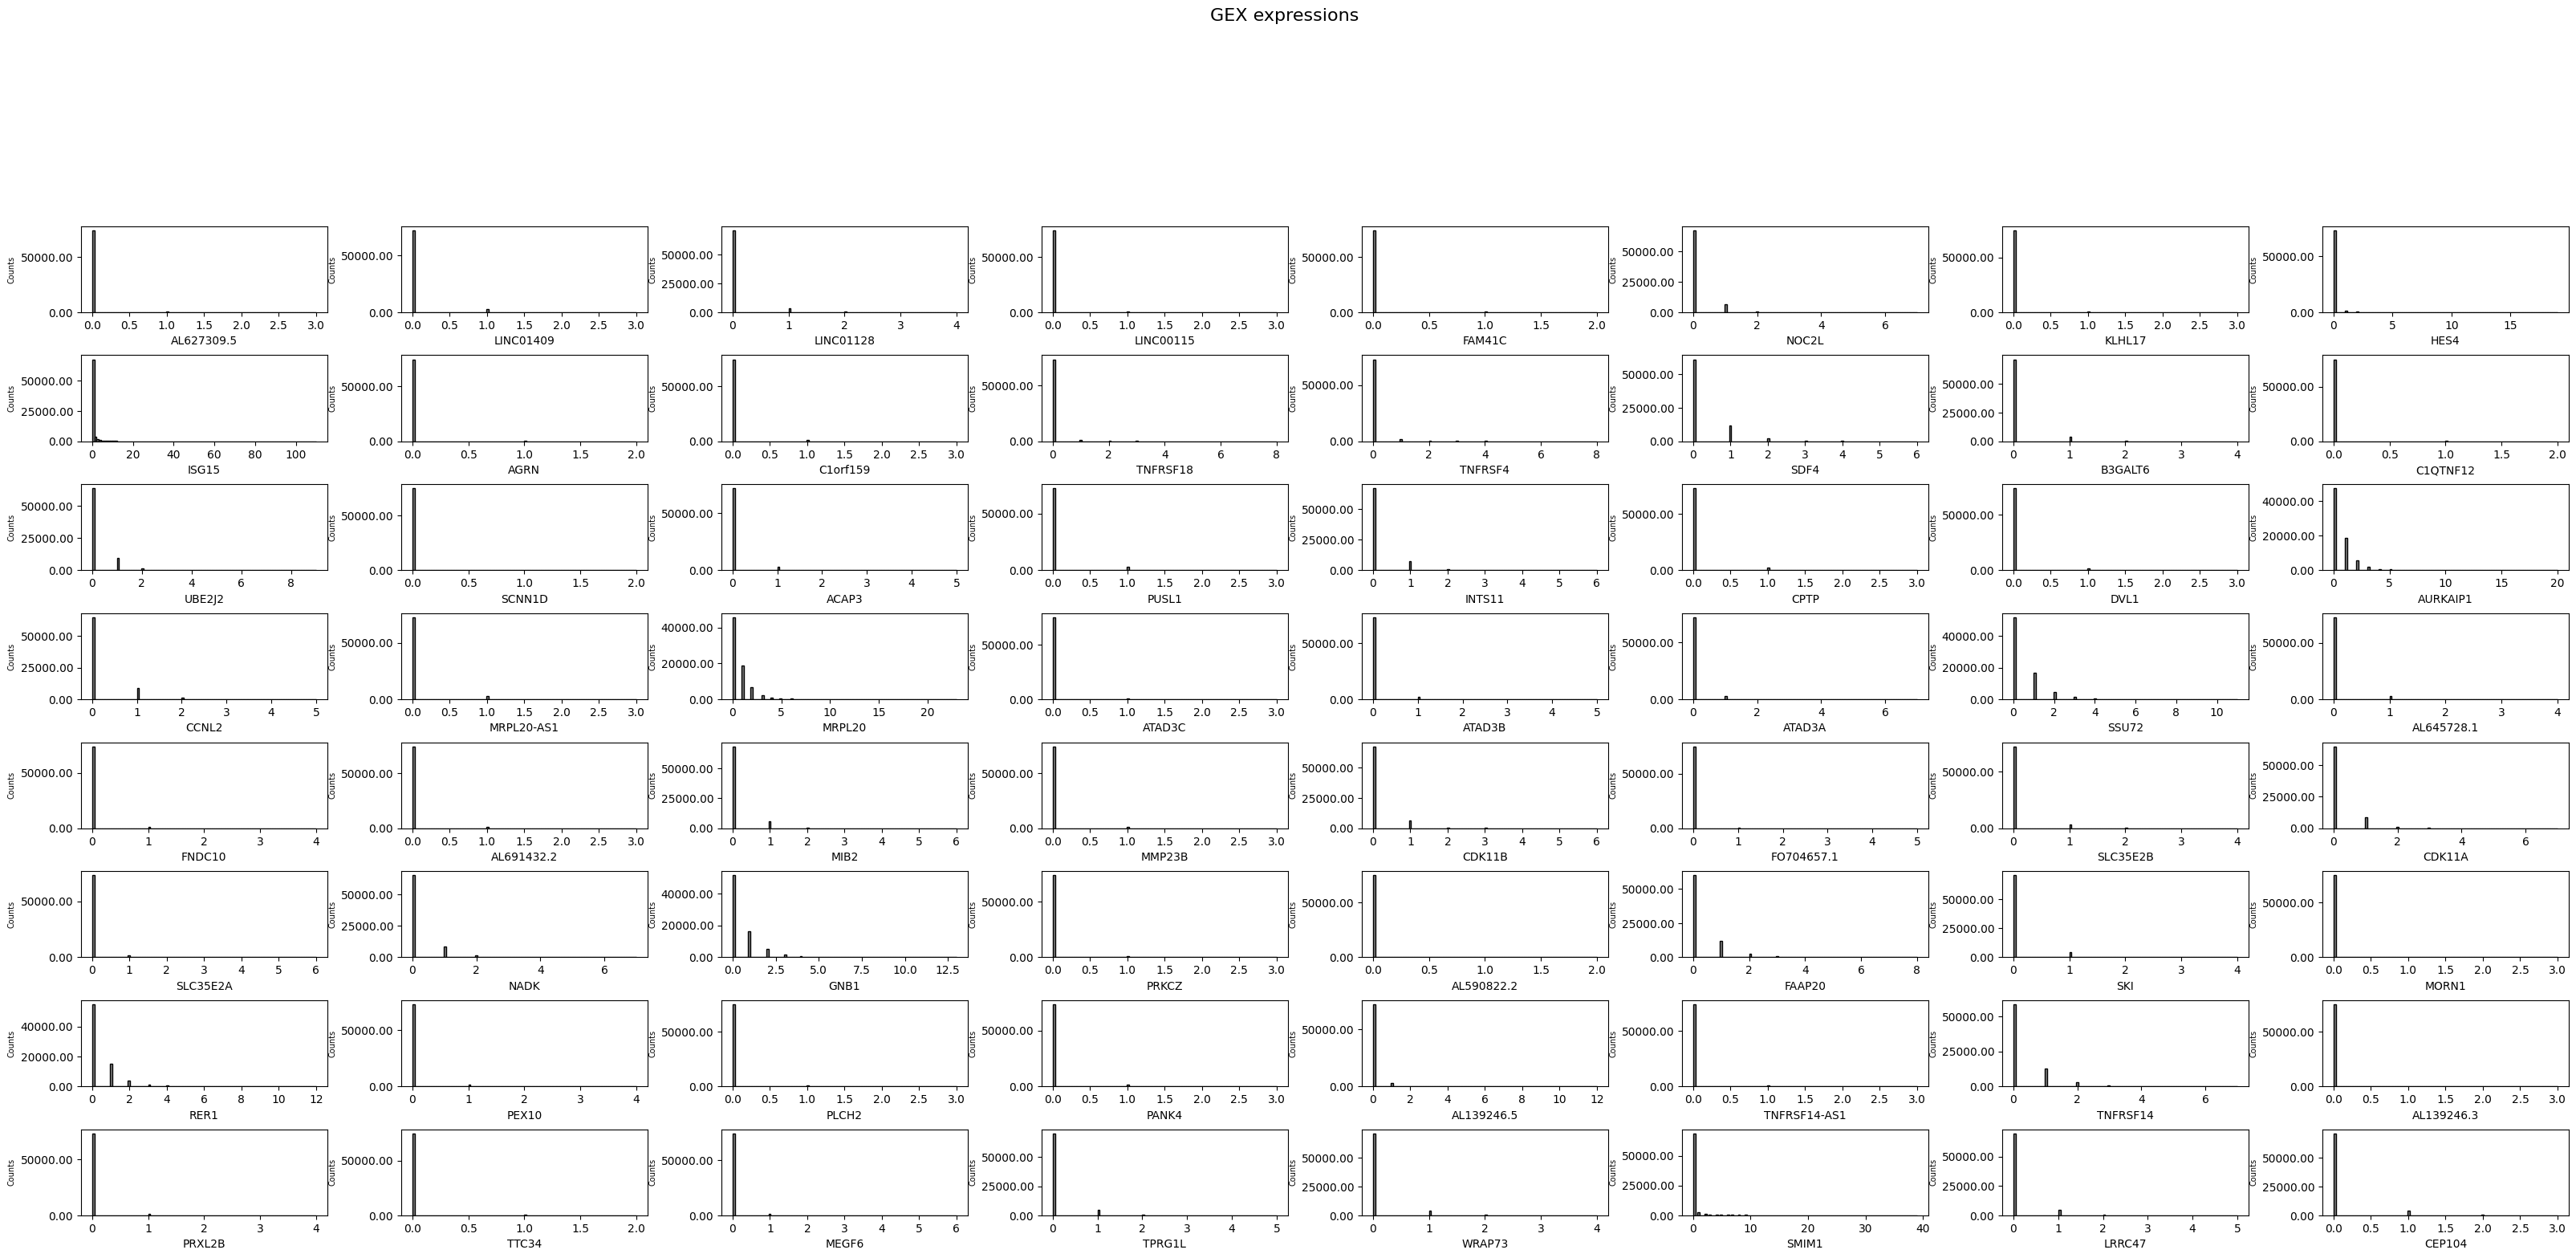

In [38]:
make_histograms(gex_expressions, gex_expressions.columns, "GEX expressions", subplots_shape=(8, 8), display_desc=True, title_shift=1.05, bins=100, y_label="PMF estimation")

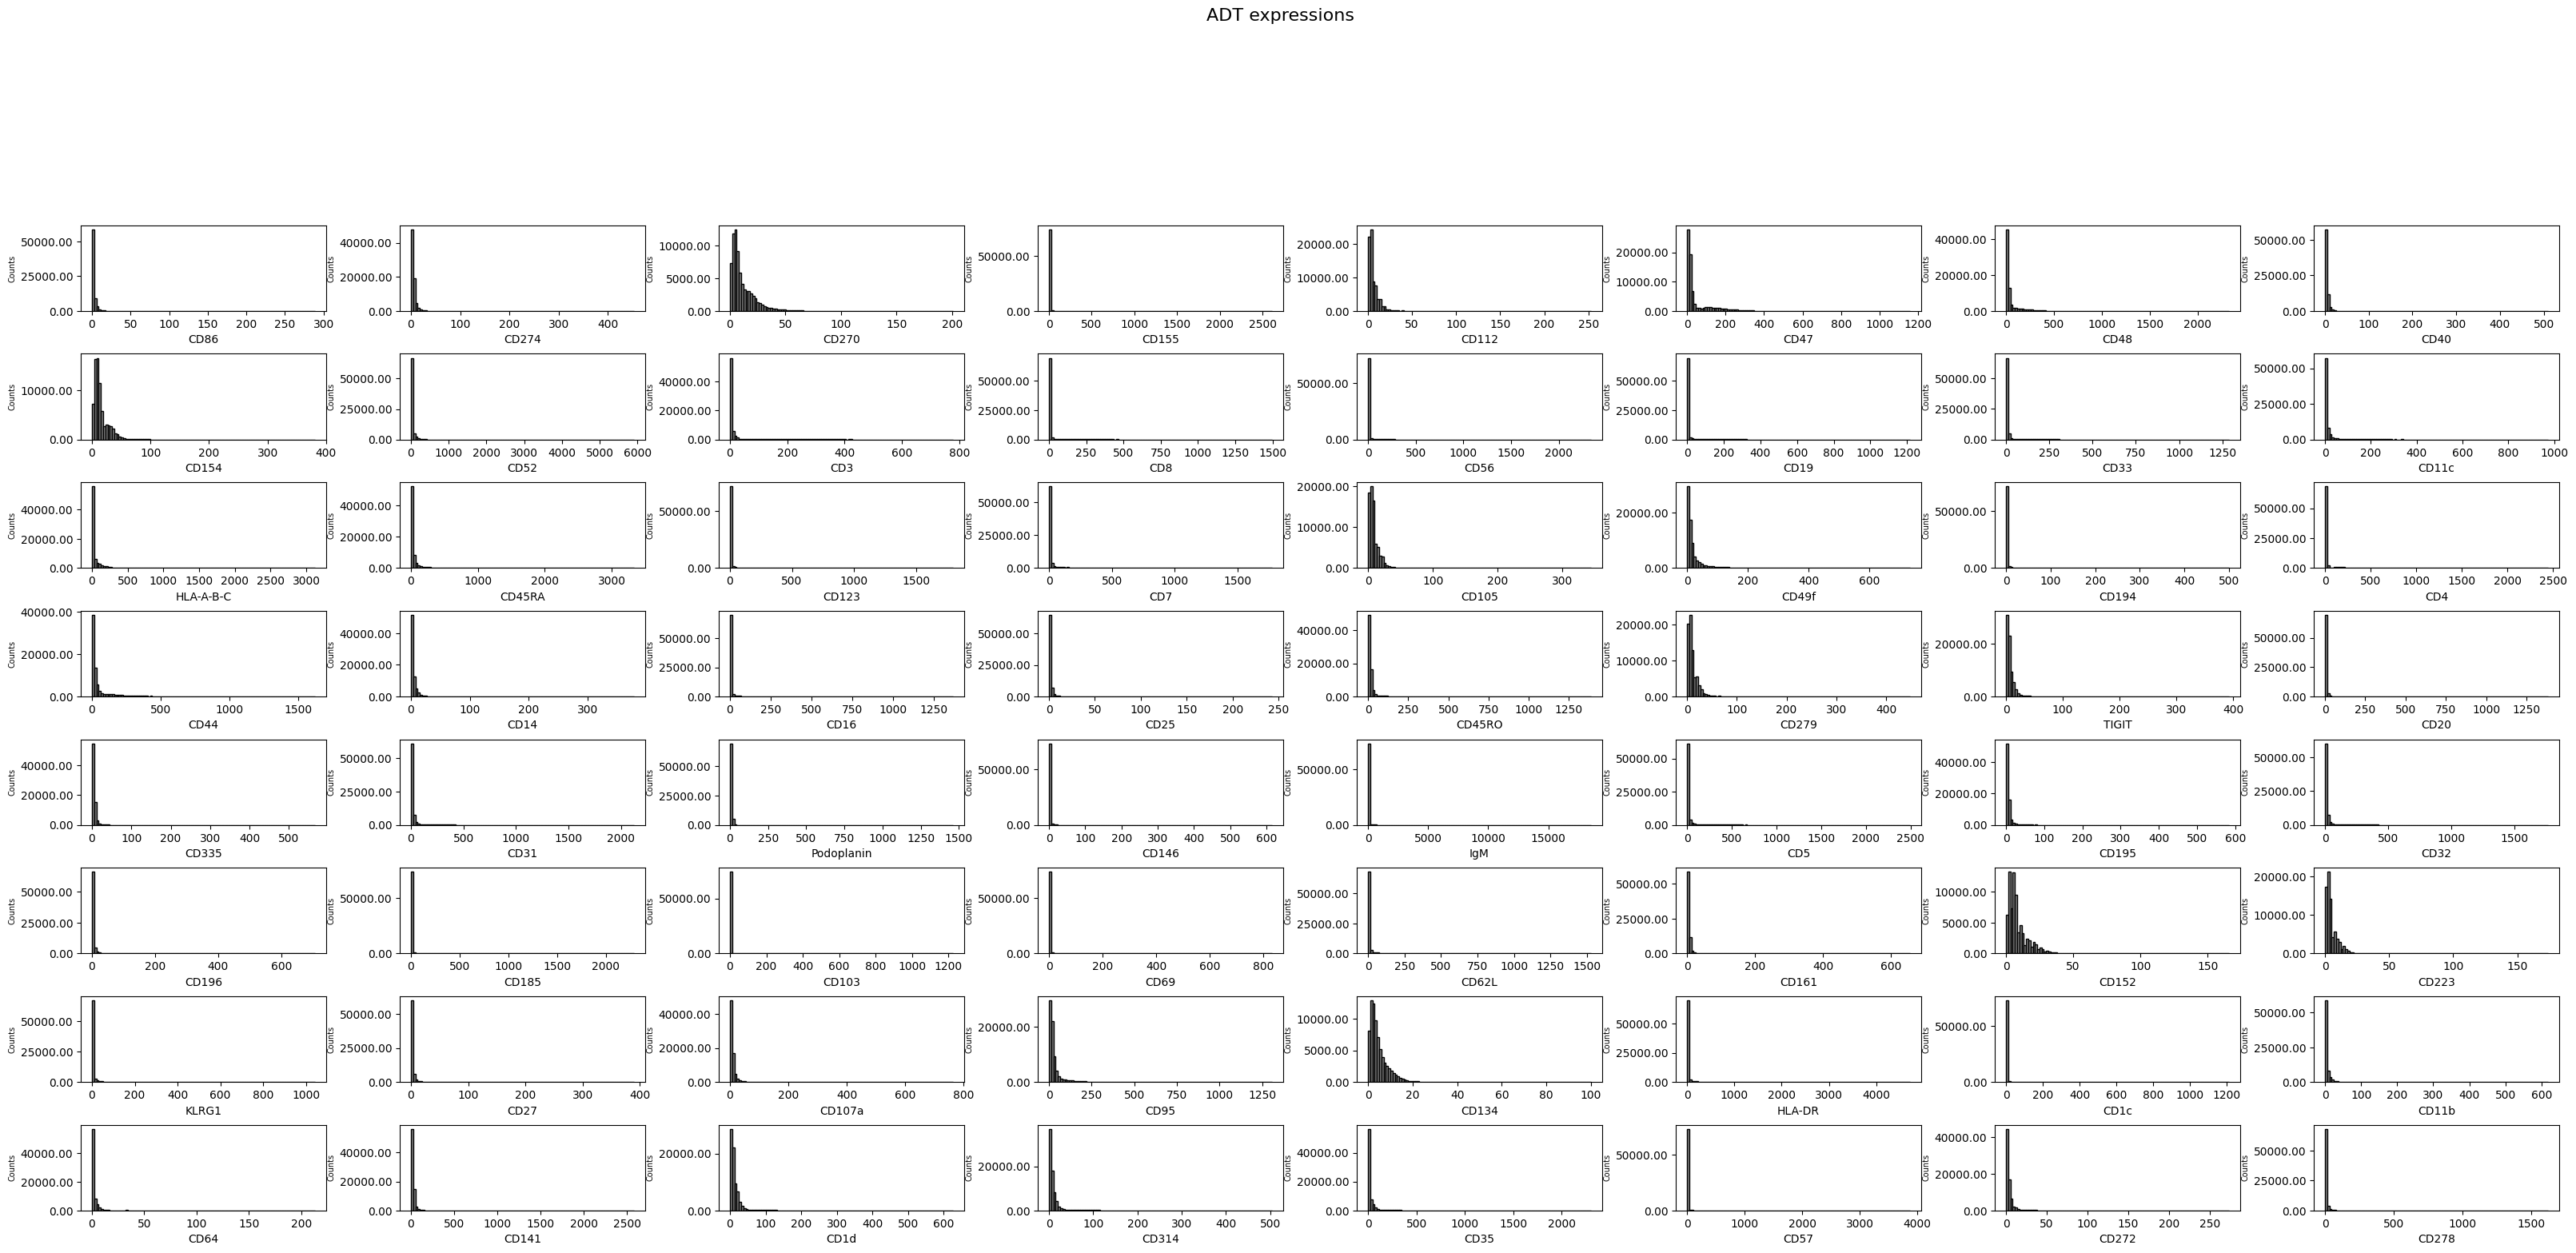

In [39]:
make_histograms(adt_expressions, adt_expressions.columns, "ADT expressions", subplots_shape=(8, 8), display_desc=True, title_shift=1.05, bins=100, y_label="PMF estimation")

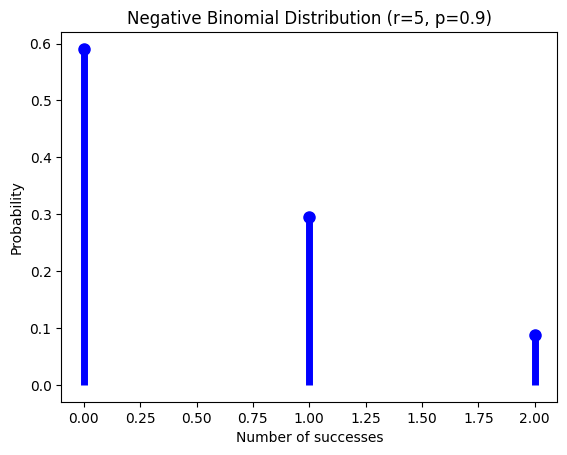

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Define the parameters of the negative binomial distribution
r = 5  # Number of failures
p = 0.9  # Probability of success

# Generate x values
x = np.arange(nbinom.ppf(0.01, r, p), nbinom.ppf(0.99, r, p))

# Calculate the pmf
pmf = nbinom.pmf(x, r, p)

# Plot the pmf
plt.plot(x, pmf, 'bo', ms=8)
plt.vlines(x, 0, pmf, colors='b', lw=5)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution (r={}, p={})'.format(r, p))
plt.show()

In [48]:
expressions[:, gex_indicator].sum(axis=0)

array([ 790., 2898., 4643., ..., 2786.,  530.,  341.], dtype=float32)

## Pearson residuals preprocessing